<a href="https://colab.research.google.com/github/JackMyles/CS156a-LearningFromData/blob/main/cs156a_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 156a HW 4

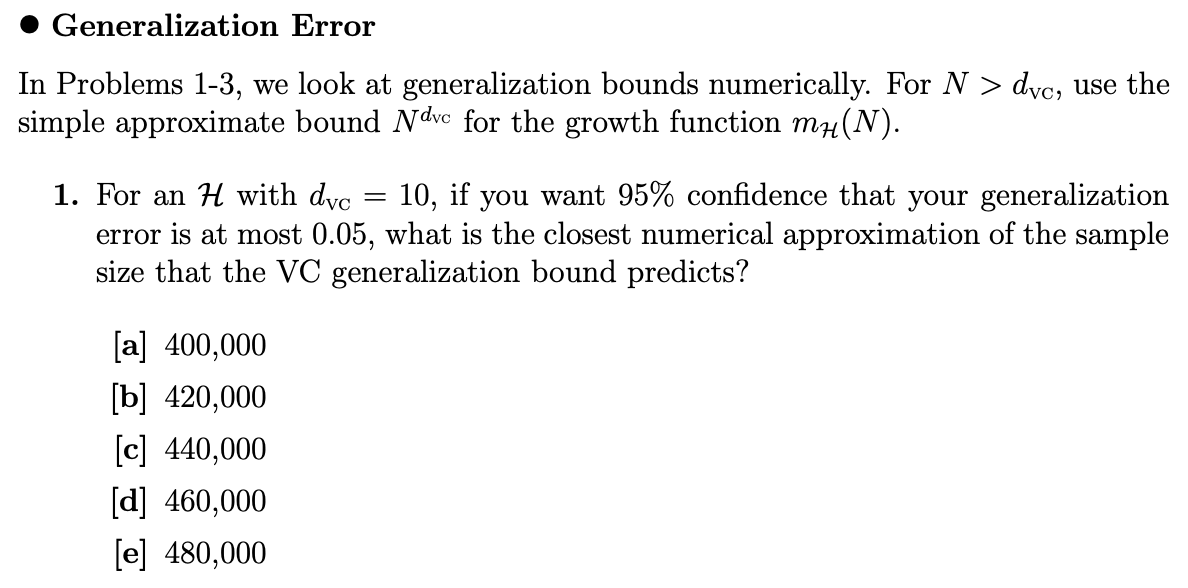

In [ ]:
from IPython.display import Image
Image(filename="/Users/jackmyles/Documents/Screenshot 2023-10-23 at 12.26.28 AM.png", width=600)

#### Answer:
D

In [ ]:
import math, numpy as np

def error(N):
    # VC Inequality: P[|E_in(g) - E_out(g)| > ε] <= 4 * m_H * (2N) * e^(-1/8 * ε^2 * N)
    return (4 * ((2 * N) ** 10) * (math.exp(-1 / 8 * (0.05 ** 2) * N)))

answers = [400000, 420000, 440000, 460000, 480000]
errors = []
for answer in answers:
    errors.append(error(answer))

print(f"The closest numerical approximation of the sample size that the VC generalization bound predicts is: {answers[(np.abs(np.asarray(errors) - 0.05)).argmin()]}")

The closest numerical approximation of the sample size that the VC generalization bound predicts is: 460000


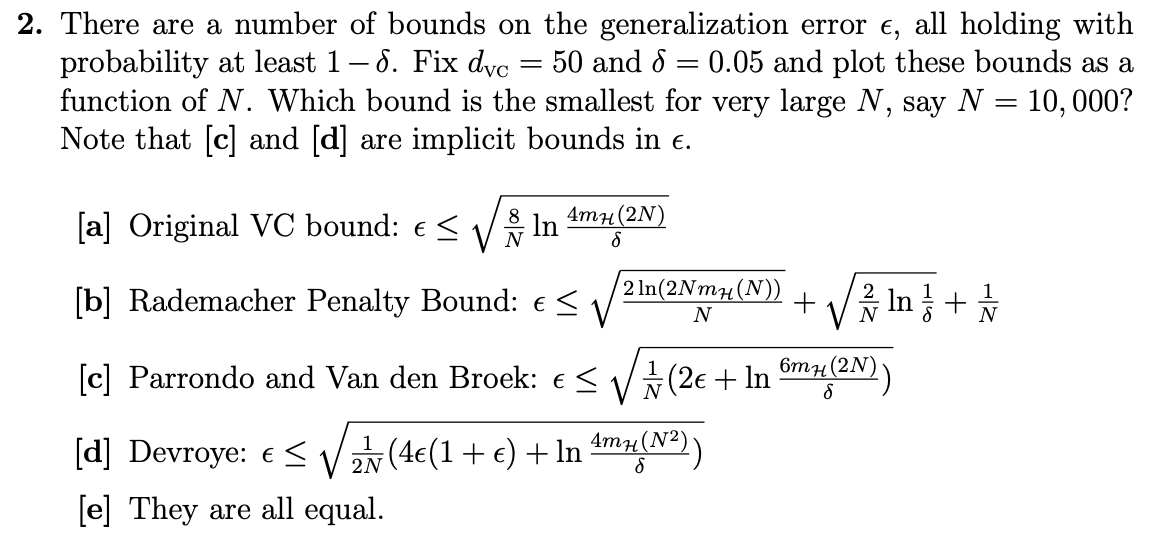

In [ ]:
Image(filename="/Users/jackmyles/Documents/Screenshot 2023-10-23 at 1.02.52 AM.png", width=600)

#### Answer:
D

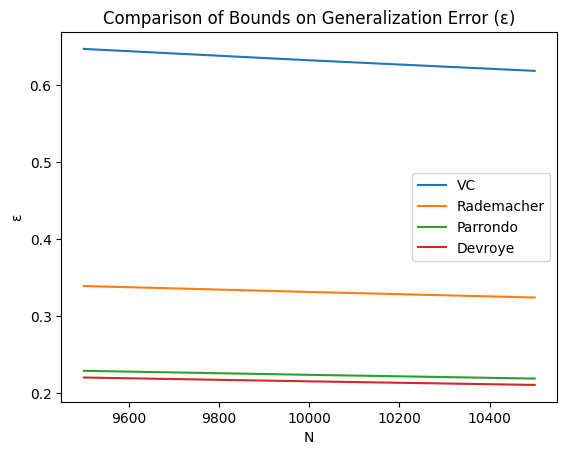

In [ ]:
import matplotlib.pyplot as plt
from scipy import optimize

d_vc = 50
delta = 0.05

def vc(N):
    return math.sqrt(8 / N * math.log((4 * ((2 * N) ** d_vc)) / delta))

def rademacher(N):
    return math.sqrt(2 / N * math.log(2 * N * (N ** d_vc))) + math.sqrt(2 / N * math.log(1 / delta)) + 1 / N

def parrondo(N, a, b):
    f = lambda epsilon: math.sqrt(1 / N * (2 * epsilon + math.log(6 / delta * ((2 * N) ** d_vc)))) - epsilon
    return optimize.brentq(f, a, b)

def devroye(N, a, b):
    # ln(m_H(N^2)) = ln(N^(2 * d_vc)) = 2 * d_vc * ln(N)
    f = lambda epsilon: math.sqrt((1 / (2 * N)) * (4 * epsilon * (1 + epsilon) + math.log(4 / delta) + 2 * d_vc * math.log(N))) - epsilon
    return optimize.brentq(f, a, b)

x = range(9500, 10501, 500)
y_vc = [vc(N) for N in x]
y_rademacher = [rademacher(N) for N in x]
y_parrondo = [parrondo(N, 0, 1) for N in x]
y_devroye = [devroye(N, 0, 1) for N in x]

graph = plt.figure()
plt.plot(x, y_vc, label='VC')
plt.plot(x, y_rademacher, label='Rademacher')
plt.plot(x, y_parrondo, label='Parrondo')
plt.plot(x, y_devroye, label='Devroye')
plt.xlabel('N')
plt.ylabel('ε')
plt.title('Comparison of Bounds on Generalization Error (ε)')
plt.legend()
plt.show()

# Devroye bound is the smallest at N = 10000

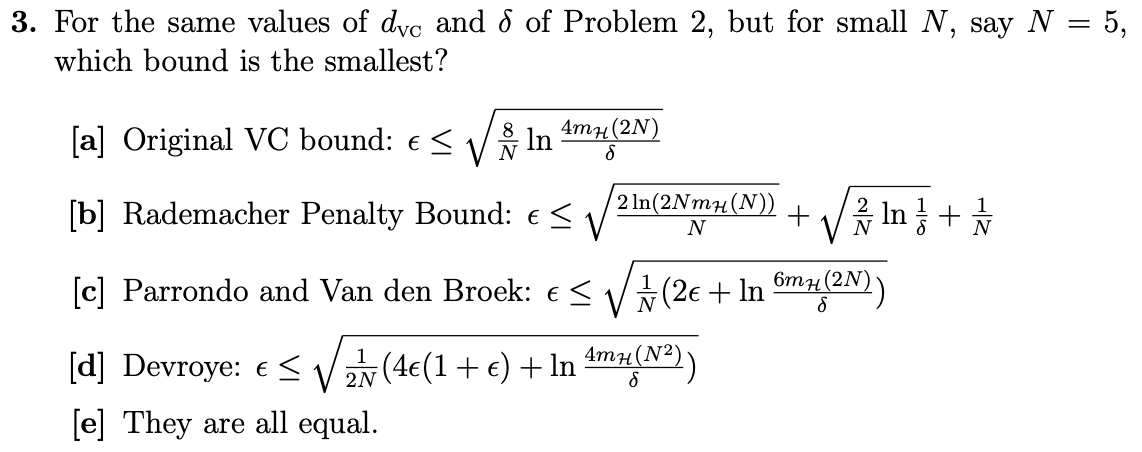

In [ ]:
Image(filename="/Users/jackmyles/Documents/Screenshot 2023-10-23 at 1.37.41 AM.png", width=600)

#### Answer:
C

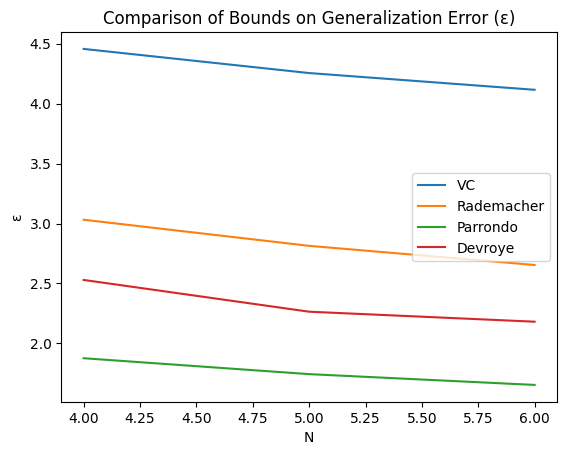

In [ ]:
# N < d_vc so m_H(N) = 2^N

def vc(N):
    return math.sqrt(8 / N * math.log((4 * (2 ** (2 * N)) / delta)))

def rademacher(N):
    return math.sqrt(2 / N * math.log(2 * N * (2 ** N))) + math.sqrt(2 / N * math.log(1 / delta)) + 1 / N

def parrondo(N, a, b):
    f = lambda epsilon: math.sqrt(1 / N * (2 * epsilon + math.log(6 / delta * (2 ** (2 * N))))) - epsilon
    return optimize.brentq(f, a, b)

def devroye(N, a, b):
    # ln(m_H(N^2)) = ln(N^(2 * d_vc)) = 2 * d_vc * ln(N)
    f = lambda epsilon: math.sqrt((1 / (2 * N)) * (4 * epsilon * (1 + epsilon) + math.log(4 / delta * (2 ** (N ** 2))))) - epsilon
    return optimize.brentq(f, a, b)

x = range(4, 7, 1)
y_vc = [vc(N) for N in x]
y_rademacher = [rademacher(N) for N in x]
y_parrondo = [parrondo(N, 0, 5) for N in x]
y_devroye = [devroye(N, 0, 5) for N in x]

graph = plt.figure()
plt.plot(x, y_vc, label='VC')
plt.plot(x, y_rademacher, label='Rademacher')
plt.plot(x, y_parrondo, label='Parrondo')
plt.plot(x, y_devroye, label='Devroye')
plt.xlabel('N')
plt.ylabel('ε')
plt.title('Comparison of Bounds on Generalization Error (ε)')
plt.legend()
plt.show()

# Parrondo bound is the smallest at N = 5

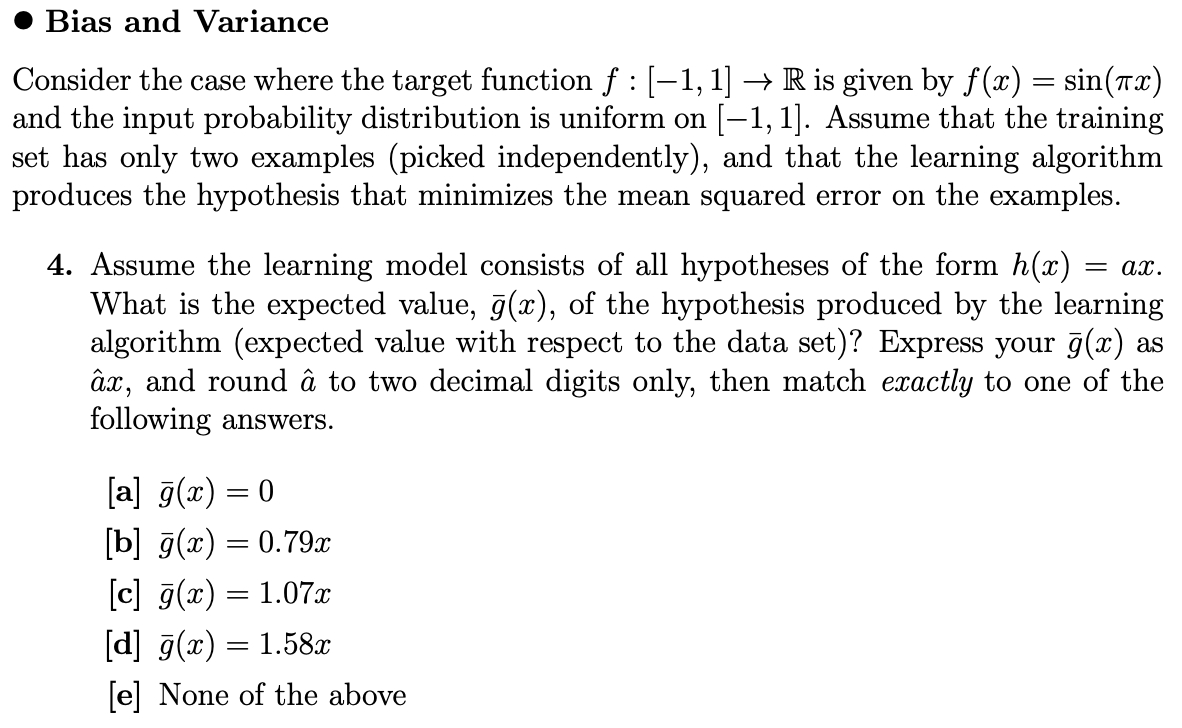

In [ ]:
Image(filename="/Users/jackmyles/Documents/Screenshot 2023-10-23 at 2.12.14 AM.png", width=600)

#### Answer:
E

In [ ]:
RUNS = 10000
a_total = 0
N = 2

for _ in range(RUNS):
    x = np.random.uniform(-1, 1, N)
    y = np.sin(np.pi * x)
    X = np.array([x]).T

    x_dag = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    w = np.dot(x_dag, y)

    a = w[0]
    a_total += a

a_avg = a_total / RUNS
print(f"Average of â for N={N} training points over {RUNS} runs: {'%.2f' % a_avg}")

Average of â for N=2 training points over 10000 runs: 1.42


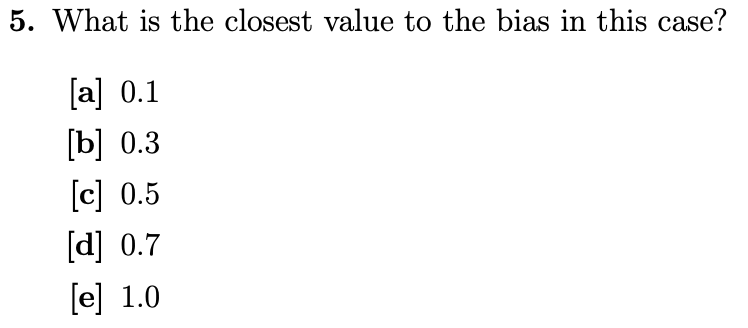

In [ ]:
Image(filename="/Users/jackmyles/Documents/Screenshot 2023-10-23 at 2.48.10 AM.png", width=400)

#### Answer:
B

In [ ]:
# bias(x) = E_X[(g_bar(x) - f(x))^2] (slide 9 lecture 8)

N = 1000
x = np.random.uniform(-1, 1, N)

f = np.sin(np.pi * x)
g_bar = a_avg * x

bias = sum((g_bar - f) ** 2) / N
print(f"Bias: {'%.1f' % bias}")

Bias: 0.3


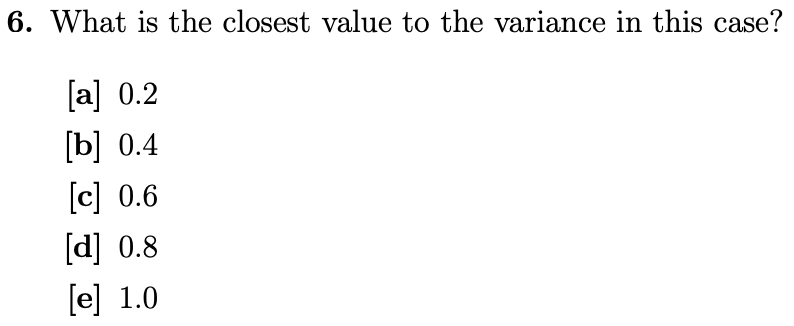

In [ ]:
Image(filename="/Users/jackmyles/Documents/Screenshot 2023-10-23 at 3.04.19 AM.png", width=400)

#### Answer:
A

In [ ]:
# var(x) = E_X[E_D[(g^D(x) - g_bar(x))^2]] (slide 9 lecture 8)

E_X = 0
RUNS_X = 1000
RUNS_D = 100

for _ in range(RUNS_X):
    x = np.random.uniform(-1,1)
    E_D = 0

    for __ in range(RUNS_D):
        p_x = np.random.uniform(-1, 1, 2)
        y = np.sin(np.pi * p_x)
        X = np.array([p_x]).T

        x_dag = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
        w = np.dot(x_dag, y)

        a = w[0]

        g = a * x
        g_bar = a_avg * x

        E_D += (g - g_bar) ** 2
    E_D /= RUNS_D

    E_X += E_D
E_X /= RUNS_X

variance = E_X
print(f"Variance: {'%.1f' % E_X}")

Variance: 0.2


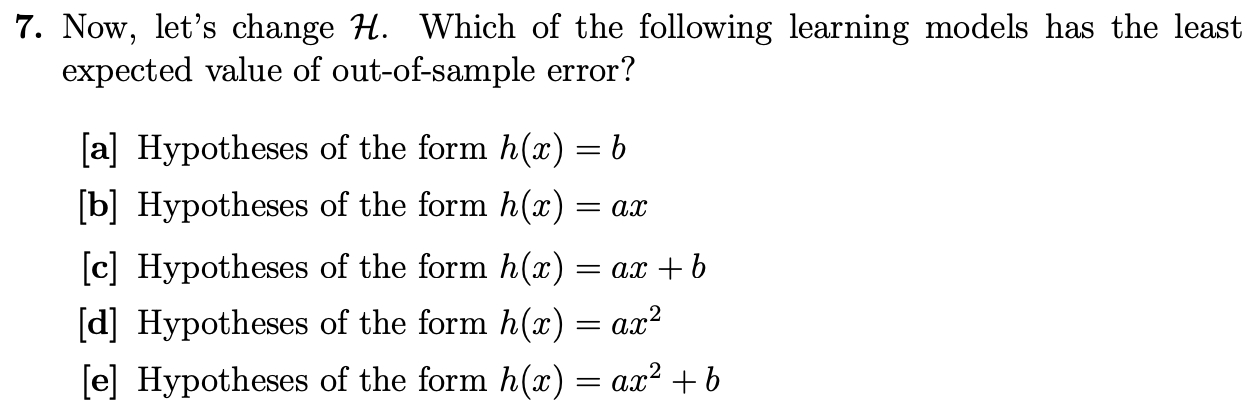

In [ ]:
Image(filename="/Users/jackmyles/Downloads/Screenshot 2023-10-23 at 3.43.15 AM.jpg", width=600)

#### Answer:
B

[a] h(x) = b : E_out = bias + var = 0.5 + 0.25 = 0.75 (from slide 15 of lecture 8)

[b] h(x) = ax : E_out = bias + var = 0.3 + 0.2 = 0.5 (from problem 5 and 6)

[c] h(x) = ax+b : E_out = bias + var = 0.21 + 1.69 = 1.9 (from slide 15 of lecture 8)

[d] h(x) = ax^2 : This hypothesis is not in a good form for a training set of two points

[e] h(x) = ax^2 + b : This hypothesis is not in a good form for a training set of two points

Therefore, h(x) = ax has the least expected value of out-of-sample error.

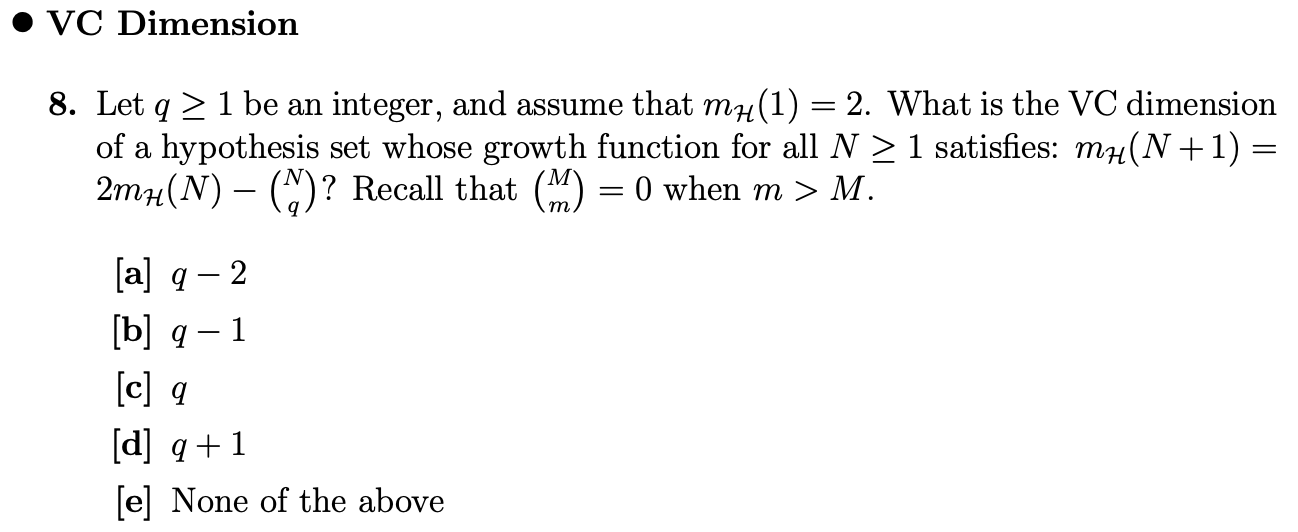

In [ ]:
Image(filename="/Users/jackmyles/Documents/Screenshot 2023-10-23 at 4.05.04 AM.png", width=600)

#### Answer:
C

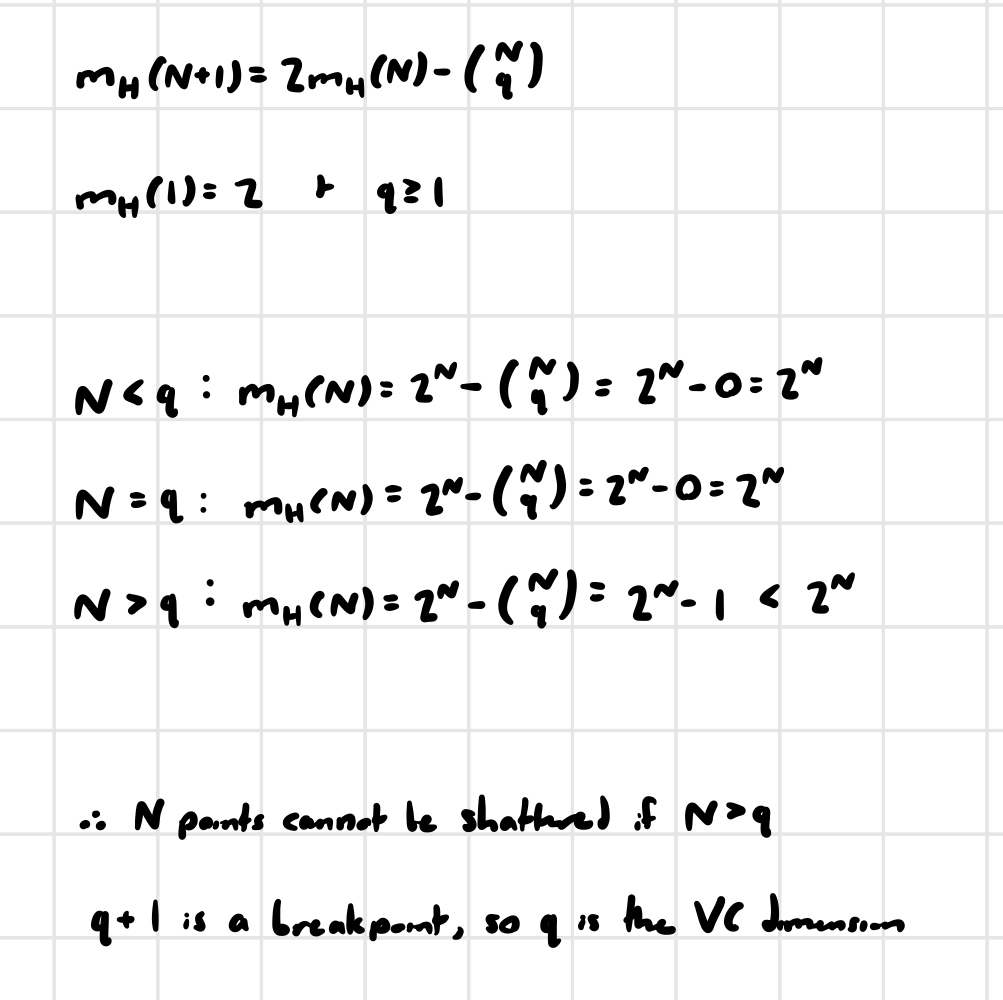

In [ ]:
Image(filename="/Users/jackmyles/Downloads/IMG_4C0FEE6236E4-1.jpeg", width=600)

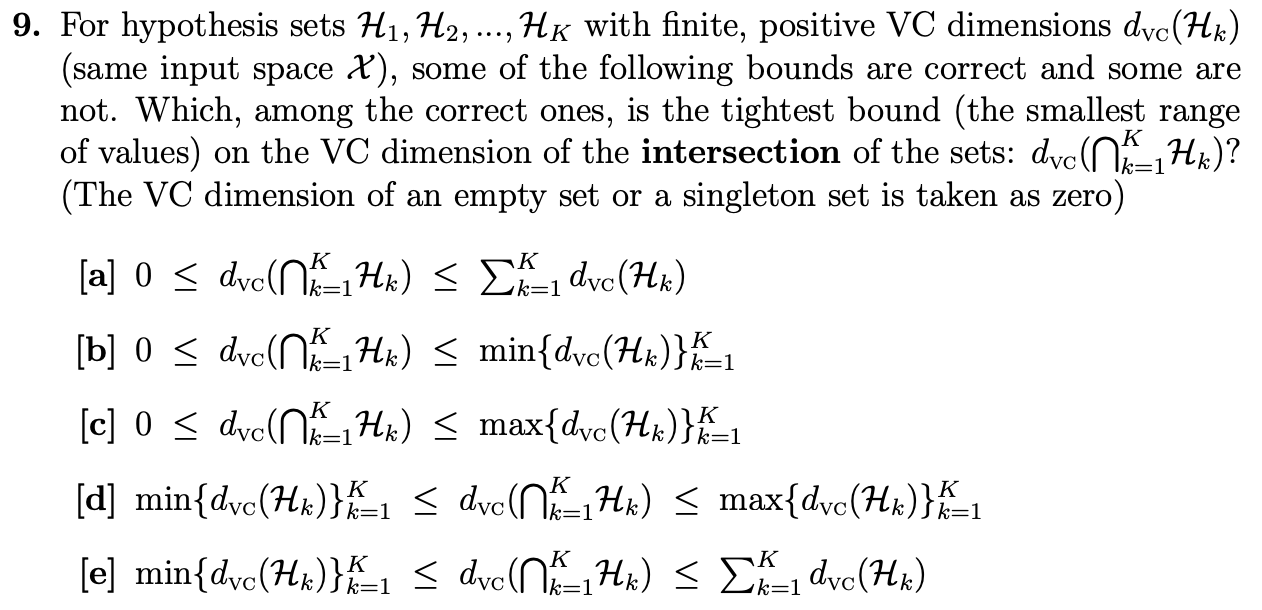

In [ ]:
Image(filename="/Users/jackmyles/Documents/Screenshot 2023-10-23 at 4.18.47 AM.png", width=600)

#### Answer:
B

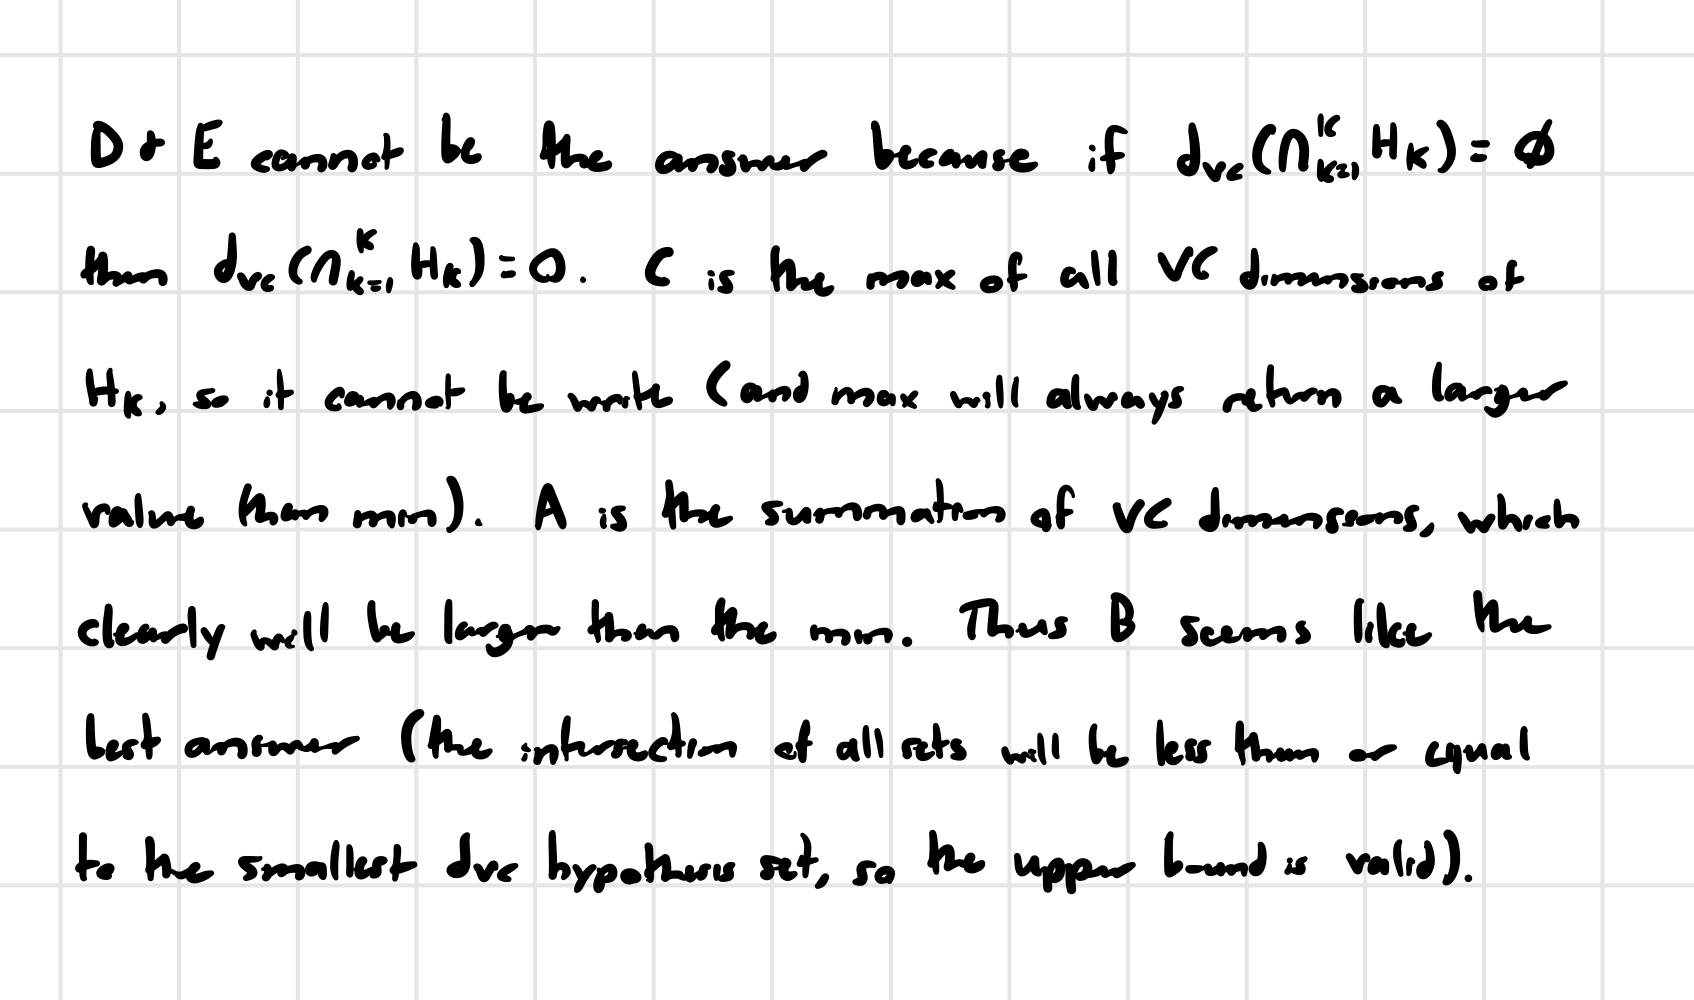

In [ ]:
Image(filename="/Users/jackmyles/Downloads/JPEG image-4B05-A6B9-EF-0.jpeg", width=600)

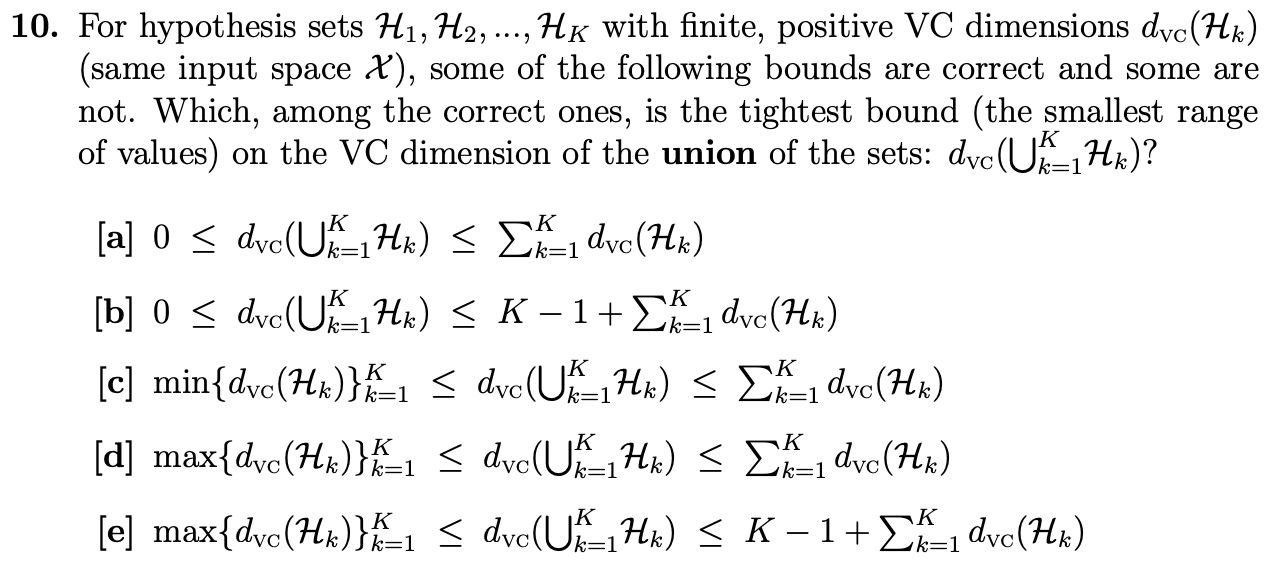

In [ ]:
Image(filename="/Users/jackmyles/Downloads/Screenshot 2023-10-23 at 4.25.12 AM.jpg", width=600)

#### Answer:
E

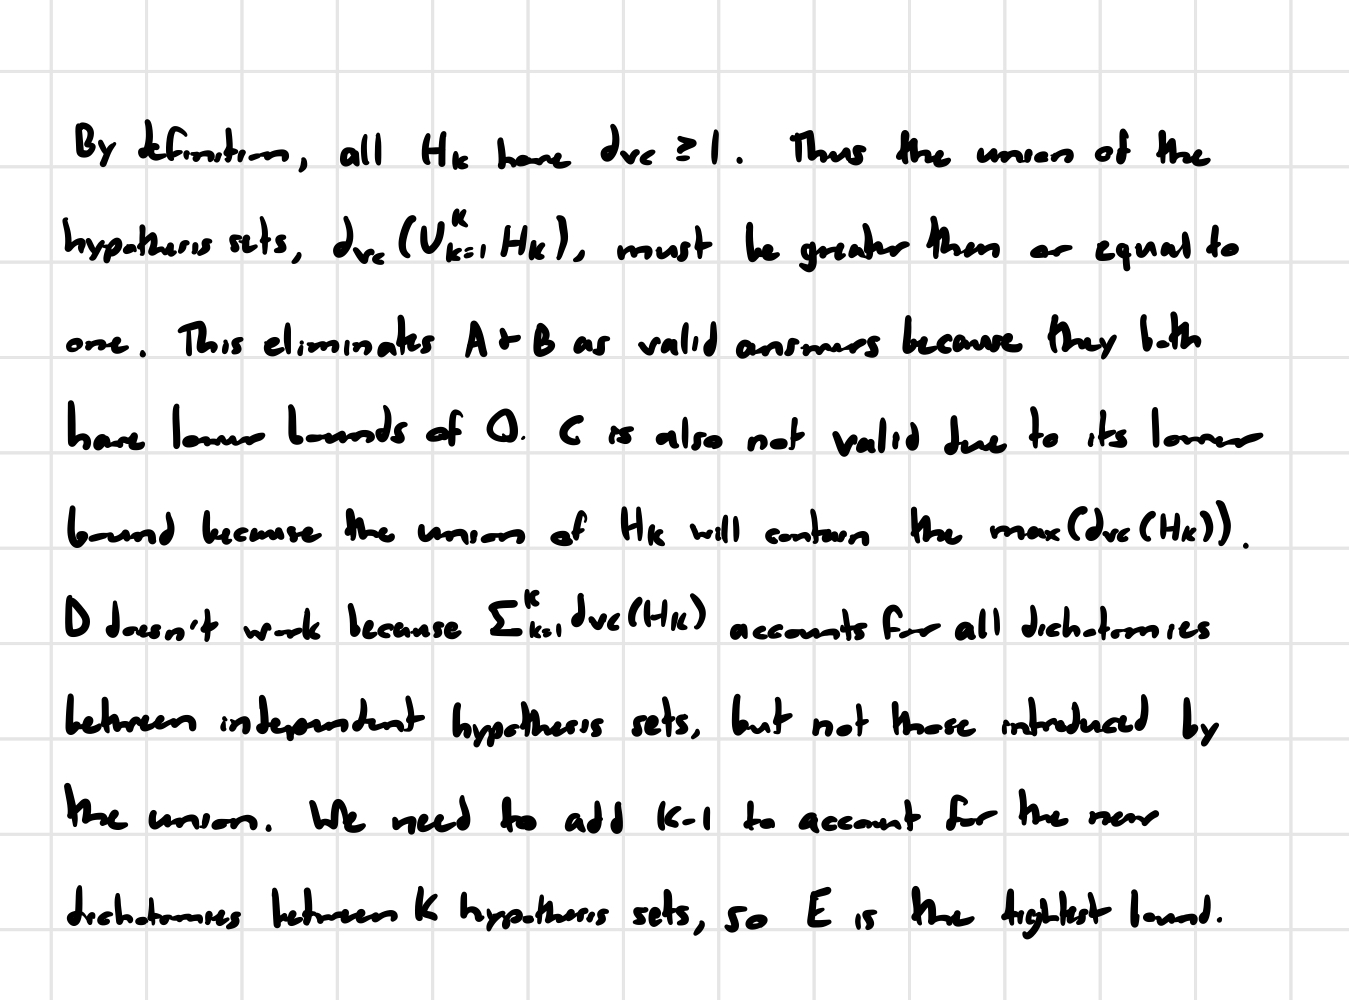

In [ ]:
Image(filename="/Users/jackmyles/Downloads/JPEG image-4793-A654-83-0.jpeg", width=600)